In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import time

In [2]:
%load_ext autoreload
%autoreload 2
from marcia import Sampler,Likelihood

In [3]:
Samp = Sampler('LCDM',['H0','Omega_m','r_d'],['CC','BAO-alam'],[70,0.3,146])

  0%|          | 0/2000 [00:00<?, ?it/s]

Best-fit values: [ 68.1401761    0.31956255 147.24480716]
Max-Likelihood value (including prior likelihood):-7.454998669891944


100%|██████████| 2000/2000 [06:21<00:00,  5.24it/s]


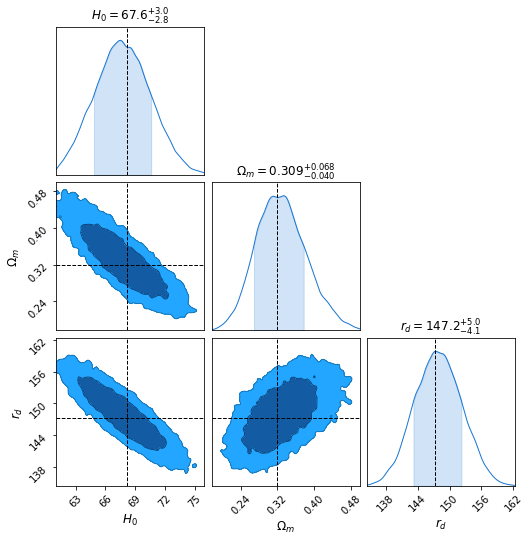

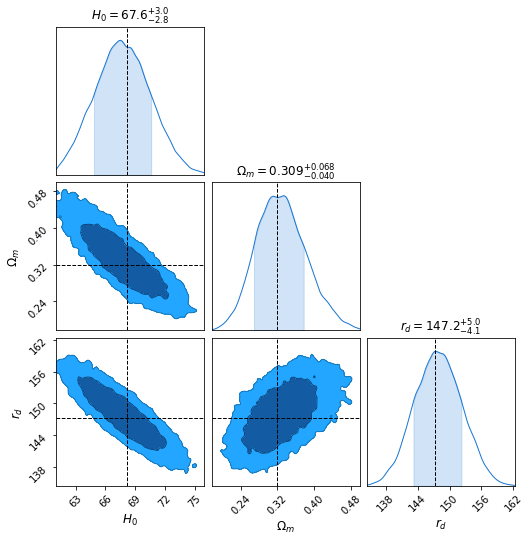

In [4]:
Samp.corner_plot()